In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestRegressor
sns.set_style('darkgrid')

In [7]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
print(bos.shape)
bos.head()

(506, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
features = pd.DataFrame(boston.data,columns=boston.feature_names)
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
targets = boston.target
targets.shape

(506,)

In [10]:
y= pd.DataFrame(targets,columns=['salesprice'])
y.head(3)

,salesprice
0,24.0
1,21.6
2,34.7


#### Making EDA 

* 1.Making Description of the features

In [11]:
dict= {'CRIM':['per capita crime rate by town'],
       'ZN':['proportion of residential land over 25,000 sq.ft.'],
       'INDUS':['proportion of non-retail business acres per town'],
       'CHAS':['Charles River dummy variable'],
       'NOX':['nitric oxides concentration per 10 million'],
       'RM':['average number of rooms per dwelling'],
       'AGE':['proportion of owner-occupied prior to 1940'],
       'DIS':['distances to five Boston employment centres'],
       'RAD':['index of accessibility to radial highways'],
       'TAX':['full-value property-tax rate per $10,000'],
       'PTRATIO':['pupil-teacher ratio by town'],
       'B':['1000(Bk - 0.63)^2,Bk is the proportion of blacks'],
       'LSTAT':['% lower status of the population']}

In [12]:
des = pd.DataFrame(dict,index=['Description'])

In [13]:
print('\nDescription of the features:')
des.T


Description of the features:


,Description
CRIM,per capita crime rate by town
ZN,"proportion of residential land over 25,000 sq.ft."
INDUS,proportion of non-retail business acres per town
CHAS,Charles River dummy variable
NOX,nitric oxides concentration per 10 million
RM,average number of rooms per dwelling
AGE,proportion of owner-occupied prior to 1940
DIS,distances to five Boston employment centres
RAD,index of accessibility to radial highways
TAX,"full-value property-tax rate per $10,000"


In [14]:
data = pd.concat([y,features],1)
data.head()

,salesprice,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


correlation graph:


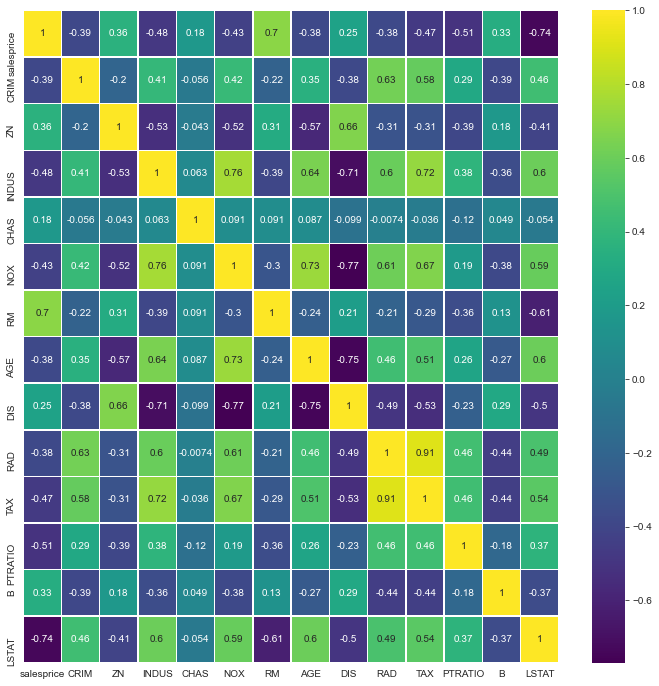

In [15]:
print("correlation graph:")
corr = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,fmt='.2g',linewidths=0.5,cmap='viridis')
plt.show()


   Feature Importancee:


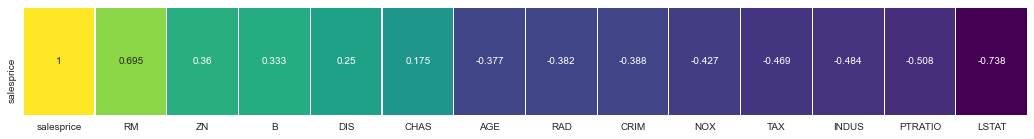

In [16]:
print("\n   Feature Importancee:")
imp = (corr[['salesprice']]).sort_values(by='salesprice',ascending=False)
plt.figure(figsize=(18,2))
sns.heatmap(imp.T,annot=True,fmt='.3g',linewidths=0.2,cbar=False,cmap='viridis')
plt.show()

In [17]:
imp[abs(imp['salesprice']) < 0.35]

,salesprice
B,0.333461
DIS,0.249929
CHAS,0.175260


### Removing 3 less important features

In [18]:
del data['B'],data['DIS'],data['CHAS']

In [19]:
data.head(2)

,salesprice,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,24.0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,15.3,4.98
1,21.6,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,17.8,9.14


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarni

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.wa

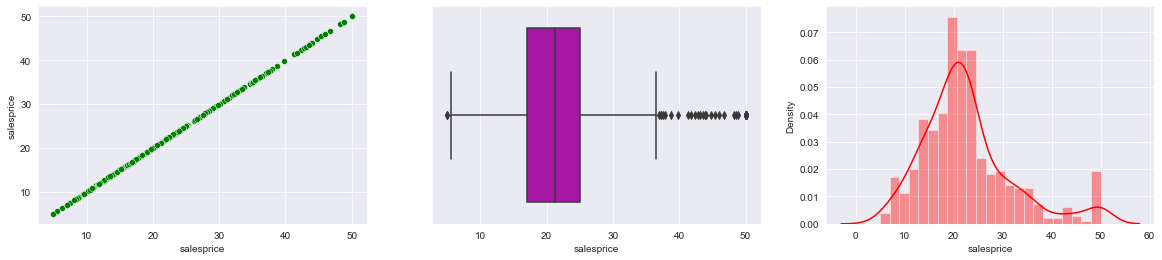

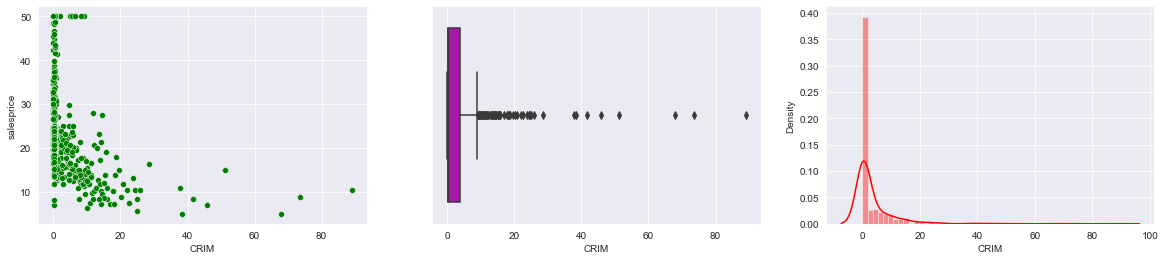

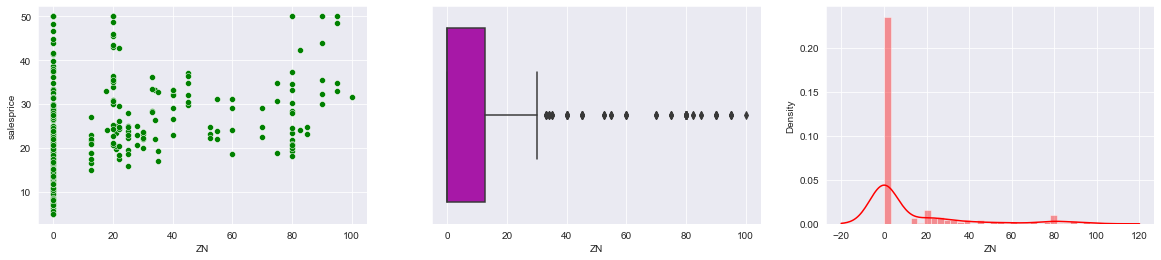

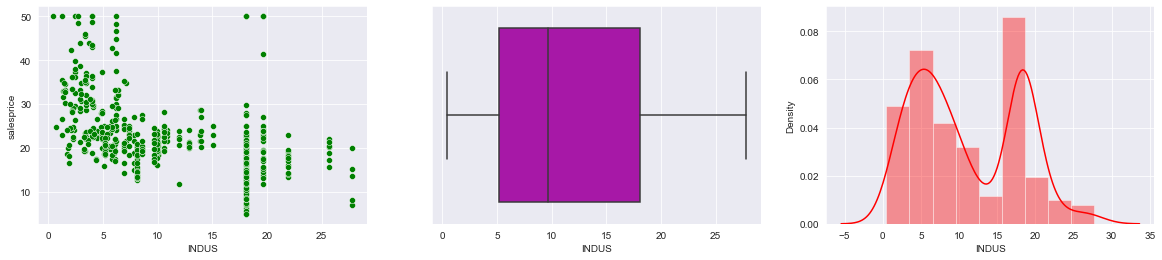

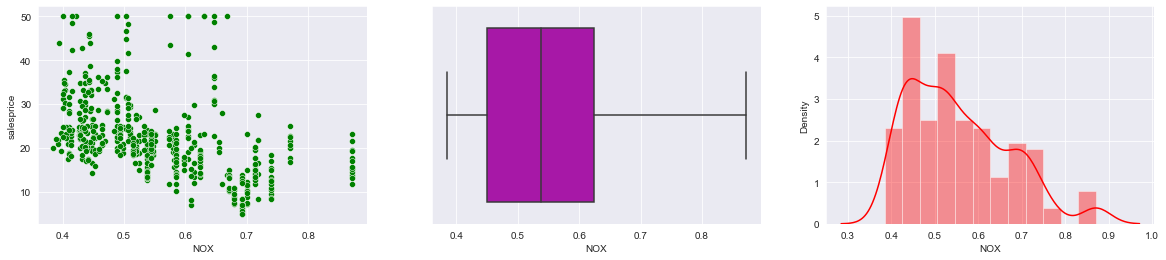

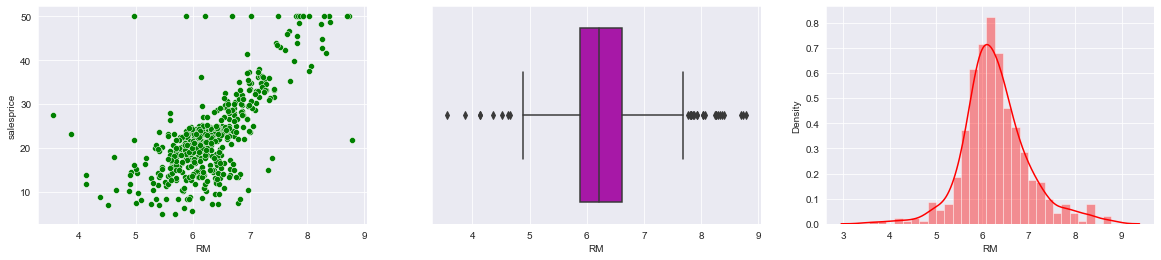

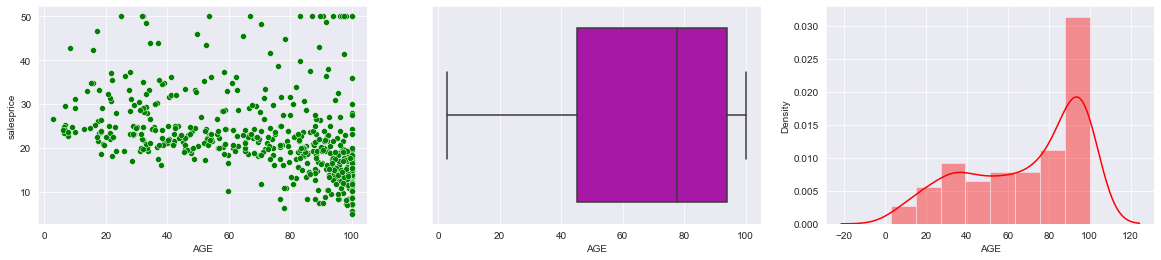

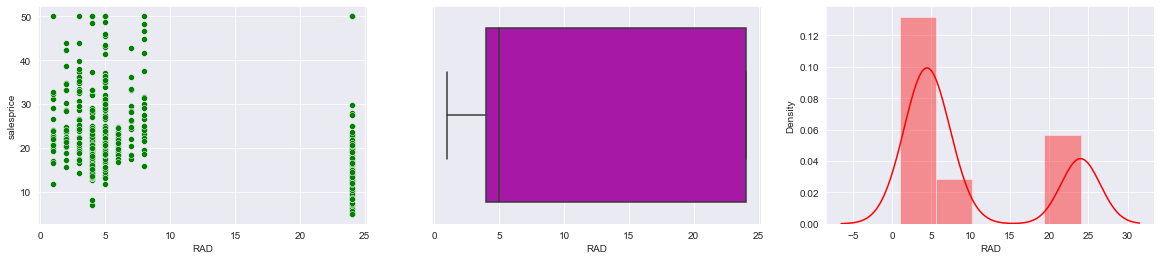

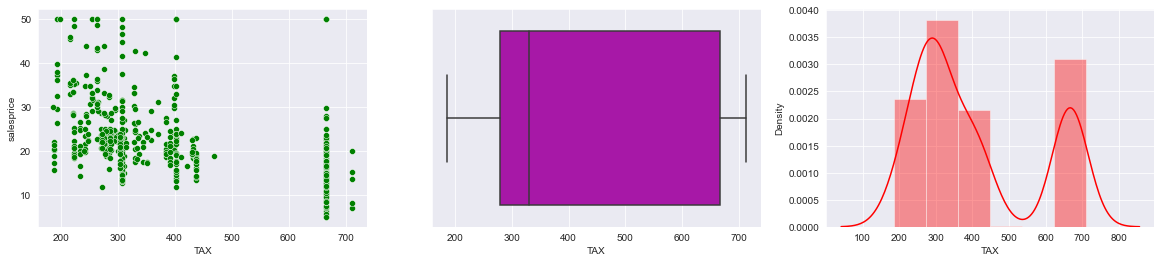

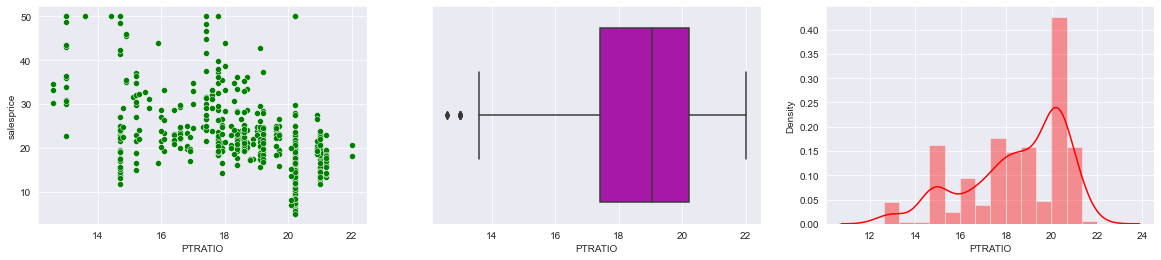

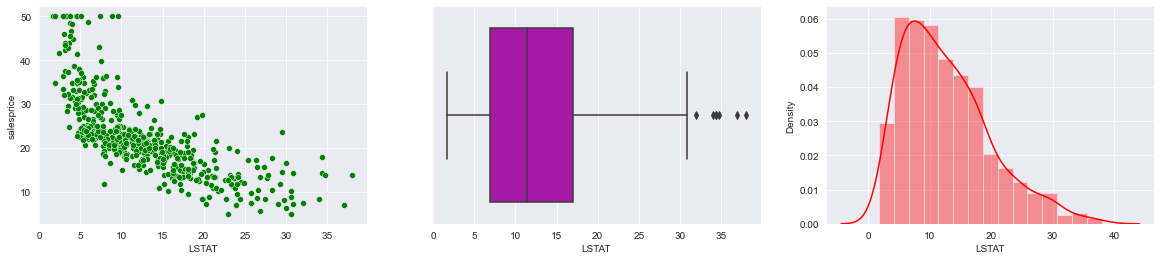

In [20]:
for i in range(len(data.columns)):
    a = data[data.columns[i]]
    b = data['salesprice']
    f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,4))
    sns.scatterplot(a,b,ax=ax1,color='g')
    sns.boxplot(a,ax=ax2,color='m')
    sns.distplot(a,ax=ax3,color='r')

In [21]:
col = ['salesprice','RM','AGE','LSTAT']

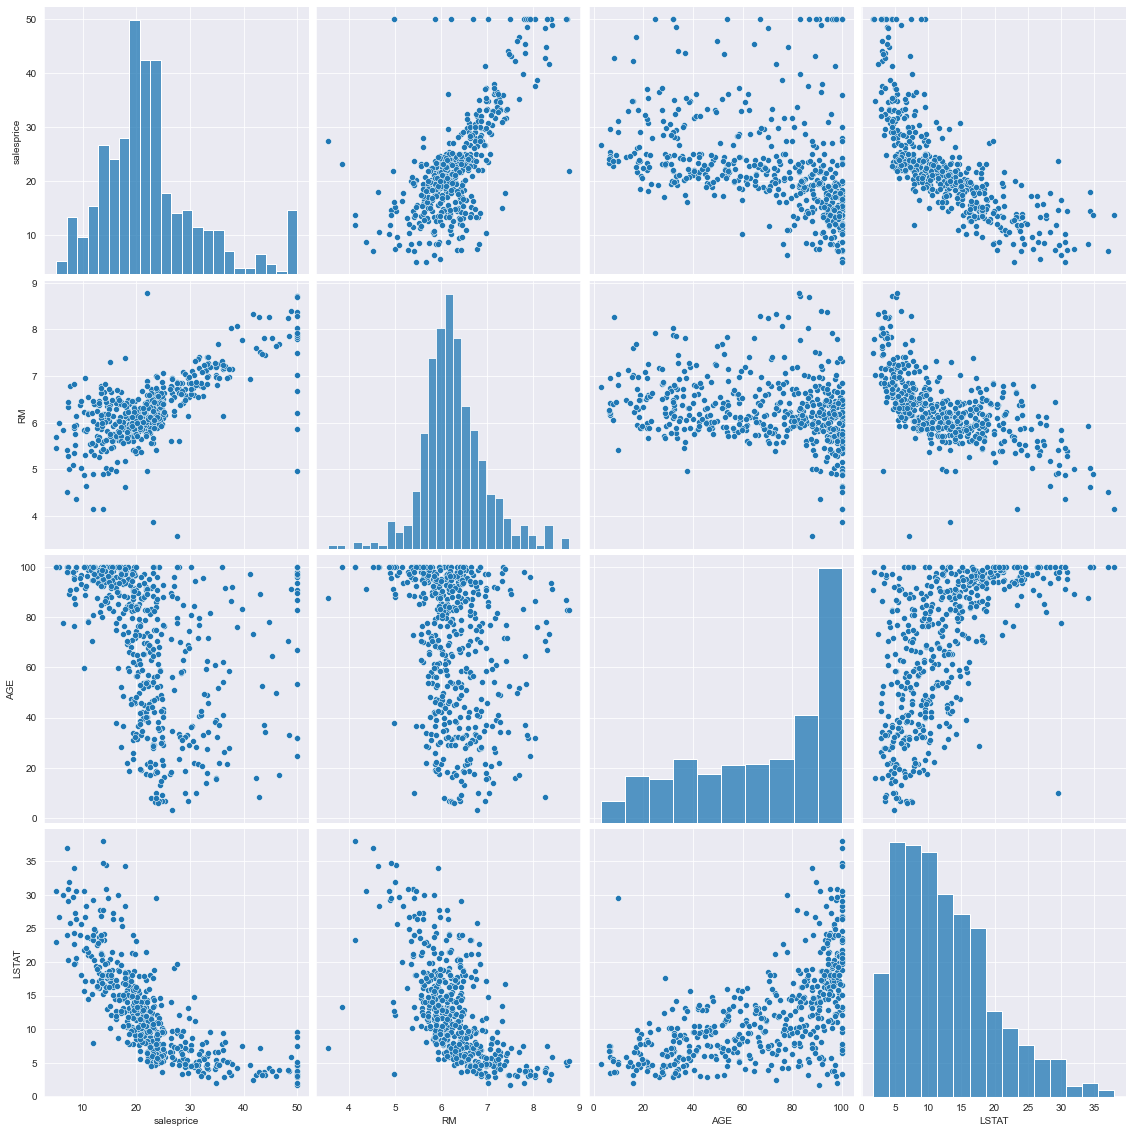

In [22]:
sns.pairplot(data[col],height=4)
plt.show()

## removing some outliers with Z-score transformation method

In [23]:
def Z_score(data,left,right):
    index= []
    mean = data.mean()
    std = data.std()
    for i in range(len(data)):
        z = (data[i]-mean)/std
        if (z >= -left) and (z <= right):
            index.append(i)
        else:
            pass
    return index 

In [24]:
clean_index = Z_score(y.salesprice,2.5,2.4)
print("Data to be cleaned:{}".format(len(y) - len(clean_index)))

Data to be cleaned:23


In [25]:
len(clean_index)

483

In [26]:
Df = data.iloc[clean_index].reset_index(drop=True).copy() # Cleaning Datas
Df.shape

(483, 11)

In [27]:
Df.head(2) # Cleaned Data

,salesprice,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,24.0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,15.3,4.98
1,21.6,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,17.8,9.14


In [28]:
del y,features,data

## Seperating X-data and Y-data

In [29]:
y = Df['salesprice'].copy()

In [30]:
X = Df.drop(['salesprice'],1).copy()

In [31]:
X.shape,y.shape

((483, 10), (483,))

In [32]:
del Df

In [33]:
rfr = RandomForestRegressor()

In [34]:
def Train_model(clf,X,y,rs=42):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.20,
                                                     random_state = rs)
    
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = clf.score(x_test,y_test)
    print(f'random state:{rs} & accuracy:{round((accuracy*100),2)} %') 
    #print(y_test.shape)

In [35]:
Train_model(rfr,X,y,rs=3)

random state:3 & accuracy:85.39 %


## GridSearch CV

In [36]:
grid_param = {
    'criterion': ['mse', 'rmse'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,5,1),
    'min_samples_split': range(1,5,1)   
}

In [37]:
grid = GridSearchCV(estimator=rfr,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [38]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.30,random_state = 3)                                                    
grid.fit(x_train,y_train)
best_parameters = grid.best_params_
print(best_parameters)

{'criterion': 'mse', 'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [39]:
rfr = RandomForestRegressor(criterion='mse', max_depth= 16, min_samples_leaf= 1, 
                             min_samples_split= 4)

In [40]:
for i in range(50):
    Train_model(rfr,X,y,rs=i)

random state:0 & accuracy:85.1 %
random state:1 & accuracy:84.55 %
random state:2 & accuracy:80.52 %
random state:3 & accuracy:85.19 %
random state:4 & accuracy:86.41 %
random state:5 & accuracy:87.47 %
random state:6 & accuracy:82.45 %
random state:7 & accuracy:81.89 %
random state:8 & accuracy:78.11 %
random state:9 & accuracy:84.11 %
random state:10 & accuracy:79.62 %
random state:11 & accuracy:76.61 %
random state:12 & accuracy:77.8 %
random state:13 & accuracy:76.67 %
random state:14 & accuracy:84.72 %
random state:15 & accuracy:85.13 %
random state:16 & accuracy:81.4 %
random state:17 & accuracy:81.96 %
random state:18 & accuracy:82.81 %
random state:19 & accuracy:80.72 %
random state:20 & accuracy:75.66 %
random state:21 & accuracy:89.37 %
random state:22 & accuracy:75.0 %
random state:23 & accuracy:84.6 %
random state:24 & accuracy:86.93 %
random state:25 & accuracy:84.05 %
random state:26 & accuracy:90.87 %
random state:27 & accuracy:86.63 %
random state:28 & accuracy:76.24 %


In [41]:
Train_model(rfr,X,y,rs=26)

random state:26 & accuracy:91.46 %


In [42]:
def CV_train(clf,X,y,n=5):
    X = pd.DataFrame(X)
    kf = KFold(n_splits=n) 
    kf.get_n_splits(X) 

    accu = []
    for train_index, test_index in kf.split(X):
        xtrain, xtest = X.iloc[train_index], X.iloc[test_index]
        ytrain,ytest = y.iloc[train_index],y.iloc[test_index]
        clf.fit(xtrain,ytrain)
        pred = clf.predict(xtest)
        acc = accuracy_score(pred,ytest)
        accu.append(acc)
    prediction = clf.predict(X1)
    ac = clf.score(prediction,y1)
    print(f"| CV: {n} | Mean Accuracy:{round(np.mean(accu)*100,2)}% | Over all Accuracy:{round(ac*100,2)}% |")

## Cross-Validation

In [43]:
from sklearn.model_selection import KFold

In [44]:
def CV_train(clf,X,y,n=5):
    X = pd.DataFrame(X)
    kf = KFold(n_splits=n) 
    kf.get_n_splits(X) 

    accu = []
    for train_index, test_index in kf.split(X):
        xtrain, xtest = X.iloc[train_index], X.iloc[test_index]
        ytrain,ytest = y.iloc[train_index],y.iloc[test_index]
        clf.fit(xtrain,ytrain)
        pred = clf.predict(xtest)
        acc = clf.score(xtest,ytest)
        accu.append(acc)
    prediction = clf.predict(X)
    ac = clf.score(X,y)
    print(f"| CV: {n} | Mean Accuracy:{round(np.mean(accu)*100,2)}% | Over all Accuracy:{round(ac*100,2)}% |")

In [45]:
for i in range(4,11):
    CV_train(rfr,x_train,y_train,n=i)

| CV: 4 | Mean Accuracy:80.47% | Over all Accuracy:91.09% |
| CV: 5 | Mean Accuracy:80.87% | Over all Accuracy:94.02% |
| CV: 6 | Mean Accuracy:82.07% | Over all Accuracy:94.29% |
| CV: 7 | Mean Accuracy:81.34% | Over all Accuracy:94.75% |
| CV: 8 | Mean Accuracy:81.21% | Over all Accuracy:94.62% |
| CV: 9 | Mean Accuracy:81.25% | Over all Accuracy:95.2% |
| CV: 10 | Mean Accuracy:79.77% | Over all Accuracy:95.21% |


In [46]:
CV_train(rfr,x_train,y_train,n=9)

| CV: 9 | Mean Accuracy:81.08% | Over all Accuracy:95.29% |


In [47]:
acu = rfr.score(x_test ,y_test)
print("Test Accuracy from model->'rfr' with CV:",round(acu*100,2),'%')

Test Accuracy from model->'rfr' with CV: 86.79 %


In [48]:
test_prediction = rfr.predict(x_test)

In [49]:
lst = list(test_prediction)

In [55]:
def Data(lst):
    lt = []
    for x in lst:
        lt.append(int(round(x)))
    return lt

In [56]:
lt = Data(lst)

In [57]:
def prediction(lt,index=0):
    try:
        if (index < len(lt)):
            print(f"\nPredicted Price of the House is Rs.{lt[index]}/-")
        else:
            print(f"put value between 0 to 145 but you have entered:{index}")
    except:
        print("Value error..")
        

In [58]:
prediction(lt,index=1200)

Put index value between Zero and 145 but you have entered:1200


In [59]:
prediction(lt,index=120)


Predicted Price of the House is Rs.20/-


In [61]:
prediction(lt,index=1)


Predicted Price of the House is Rs.21/-


## -------------------------------------------END---------------------------------------------------------